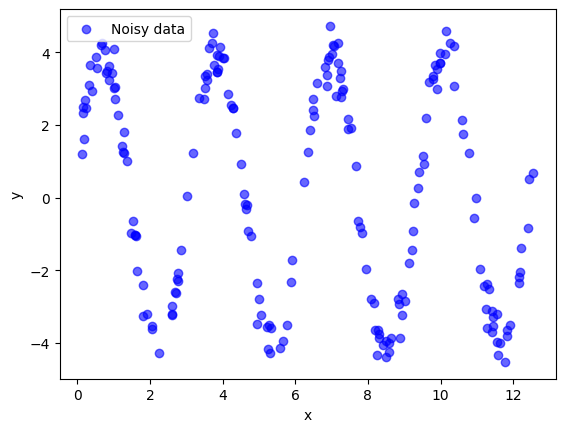

In [ ]:
#Nama : Desi Nofitasari
#NPM  : 24083010058
#Kelas: Analisis Numerik A
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM= 58

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="blue", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

**interpolasi polinomial regresi (least squares fitting)**


Polinomial orde 5:
          5           4          3         2
-0.00094 x + 0.03159 x - 0.3977 x + 2.261 x - 5.538 x + 4.828

Polinomial orde 20:
            20             19             18             17
-1.675e-13 x  + 1.578e-11 x  - 6.289e-10 x  + 1.313e-08 x 
              16             15             14             13
 - 1.292e-07 x  - 2.303e-07 x  + 2.075e-05 x  - 0.0001742 x 
             12           11          10         9         8         7
 - 0.001203 x  + 0.04165 x  - 0.4784 x  + 3.372 x - 16.33 x + 56.41 x
          6         5         4       3         2
 - 139.9 x + 244.9 x - 290.1 x + 220 x - 105.9 x + 32.59 x - 1.327

Polinomial orde 40:
            40             39             38           37
-7.151e-35 x  + 3.072e-33 x  - 2.685e-32 x  - 3.3e-31 x 
              36             35             34             33
 + 1.474e-30 x  + 5.464e-29 x  + 3.683e-28 x  - 3.195e-27 x 
              32             31             30             29
 - 9.179e-26 x  - 7.618e-25 x  

/tmp/ipython-input-1141543437.py:27: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_sorted, y_sorted, deg=d)
/tmp/ipython-input-1141543437.py:27: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_sorted, y_sorted, deg=d)
/tmp/ipython-input-1141543437.py:27: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_sorted, y_sorted, deg=d)


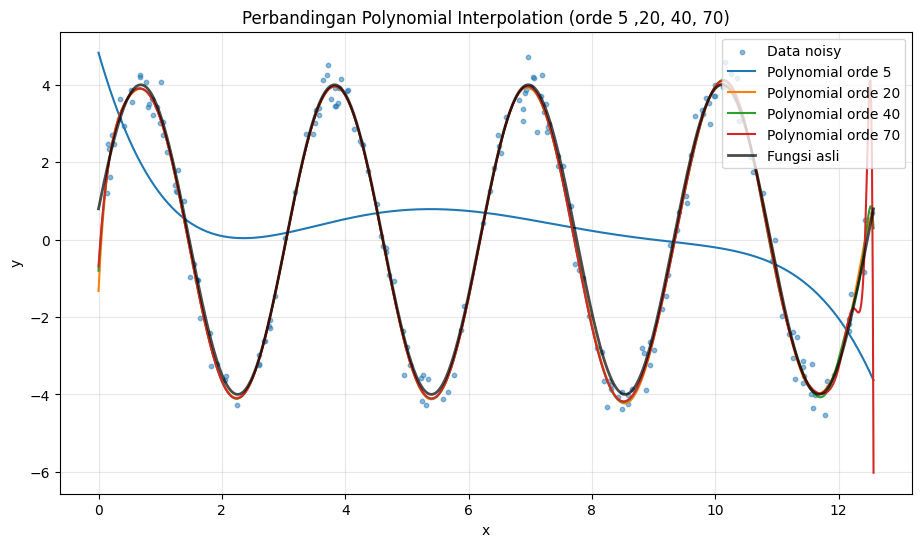

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data
n = 200
NPM = 58
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Urutkan data
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y_noisy[sort_idx]

# Grid halus
x_grid = np.linspace(0, 4*np.pi, 1000)

# Bandingkan beberapa orde
degrees = [5 ,20, 40,70]
plt.figure(figsize=(11,6))
plt.scatter(x_sorted, y_sorted, s=10, alpha=0.5, label="Data noisy")

for d in degrees:
    coeffs = np.polyfit(x_sorted, y_sorted, deg=d)
    p = np.poly1d(coeffs)
    y_fit = p(x_grid)
    plt.plot(x_grid, y_fit, linewidth=1.5, label=f"Polynomial orde {d}")

    print(f"\nPolinomial orde {d}:")
    print(p)

# Plot fungsi asli
plt.plot(x_grid, 4*np.sin(2*x_grid+0.2), color="black", linewidth=2, alpha=0.7, label="Fungsi asli")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Perbandingan Polynomial Interpolation (orde 5 ,20, 40, 70)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Dari hasil analisis numerik untuk menemukan fungsi asli dari titik-titik random tersebut menggunakan metode interpolasi polinomial regresi (least squares fitting) didapatkan visualisasi seperti gambar diatas. Metode ini dipilih karena lebih stabil untuk merepresentasikan titik-titik random daripada metode interpolasi murni yang melewati semua titik. Dari gambar diatas dihitung dengan pendekatan rumus np.polyfit atau dari persamaan least squares. 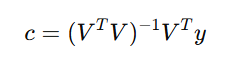
dengan pendekatan rumus tersebut dibuat polinomial order 5,20,40,70 untuk mencoba mendekati data noisy. Dari hasil yang terlihat digrafik orde kecil seperti orde 5(garis biru) terlihat lebih halus dan detail megikuti titik-titik random tapi masih jauh dengan bentuk fungsi asli. Semakin naik orde maka plot garis semakin mengikuti bentuk dari fungsi asli ,akan tetapi semakin banyak juga overfitting dan kurva makin berliku-liku serta hasilnya tidak stabil. Dari gambar diatas orde 20 lah yang paling stabil dan mengikuti pola dari fungsi asli meskipun masih terdapat sedikit overfitting, Jadi metode interpolasi polinomial ini kurang sesuai untuk menghitung fungsi kompleks seperti fungsi sinusoidal yang terlalu bergelombang dan juga disini basis fungsinya menggunakan pendekatan x kuadrat bukan sinusoid.

**Metoode Regresi Least Squares sinusoidal**

=== Persamaan Regresi ===
y ≈ 3.9405 * sin(2x) + 0.8629 * cos(2x) + -0.0779
Atau: y ≈ 4.0339 * sin(2x + 0.2156) + -0.0779

=== Evaluasi Model ===
MSE   : 0.1289
RMSE  : 0.3590
R²    : 0.9855


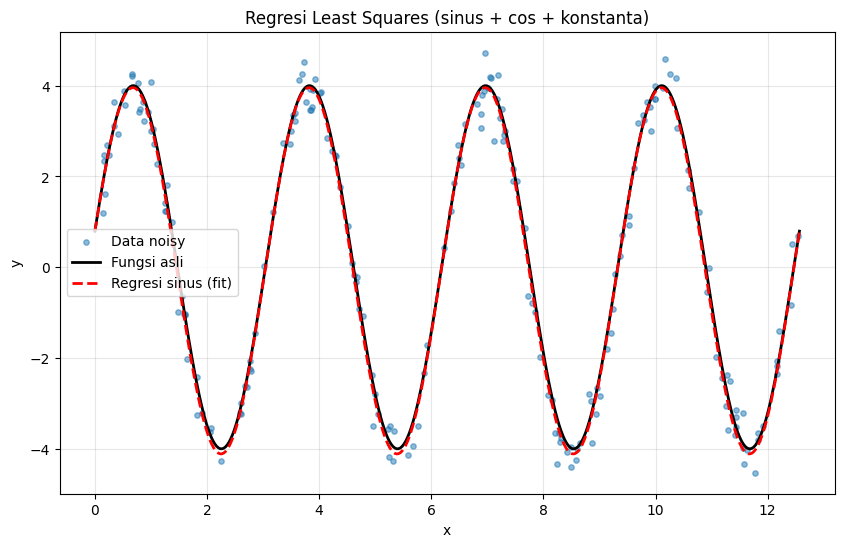

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Data
n = 200
NPM = 58
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Model regresi sinus + cos + konstanta
A = np.column_stack([np.sin(2*x), np.cos(2*x), np.ones_like(x)])
theta, *_ = np.linalg.lstsq(A, y_noisy, rcond=None)
a, b, c = theta

# Amplitudo & fase
amplitude = np.sqrt(a**2 + b**2)
phase = np.arctan2(b, a)

print("=== Persamaan Regresi ===")
print(f"y ≈ {a:.4f} * sin(2x) + {b:.4f} * cos(2x) + {c:.4f}")
print(f"Atau: y ≈ {amplitude:.4f} * sin(2x + {phase:.4f}) + {c:.4f}")

# Evaluasi model
x_grid = np.linspace(0, 4*np.pi, 400)
y_fit = a*np.sin(2*x_grid) + b*np.cos(2*x_grid) + c
y_true_grid = 4*np.sin(2*x_grid + 0.2)

# Prediksi di titik asli (buat evaluasi)
y_pred = a*np.sin(2*x) + b*np.cos(2*x) + c

mse = mean_squared_error(y_noisy, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_noisy, y_pred)

print("\n=== Evaluasi Model ===")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")

# Plot hasil
plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label="Data noisy", alpha=0.5, s=15)
plt.plot(x_grid, y_true_grid, label="Fungsi asli", linewidth=2, color="black")
plt.plot(x_grid, y_fit, label="Regresi sinus (fit)", linewidth=2, linestyle="--", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi Least Squares (sinus + cos + konstanta)")
plt.grid(alpha=0.3)
plt.show()

Metode kedua yang dilakukan untuk menemukan fungsi asli kembali yaitu dengan metode Regresi Least Squares sinusoidal. Metode ini dipilih karena paling cocok untuk menemukan nilai fungsi asli kembali dengan pendekatan sinusoidal. Perhitungan analitik dilakukan dengan matriks 3 kolom yang berisi sin(2x),cos(2x) dan 1 sesuai bentuk umum fungsi a.sin(2x)+bsin(2x)+c kemudian diselesaikan dengan fungsi np.linalg.lstsq dengan rumus asli 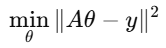

Dari rumus tersebut akan didapatkan nilai theta a,b,c terbaik yang mendekati data noisy.
untuk mengetahui apakah model berjalan dengan baik maka dicari amplitudo dan phase dengan konversi :

amplitude = np.sqrt(a**2 + b**2)

phase = np.arctan2(b, a)

dari sini akan bisa dibandingkan fungsi asli dan fungsi hasil dari model yaitu melalui phase,amplitudo,dan offset. Dari data diatas amplitudo 4.03 sangat mendekati 4 ,phase 0.21 radian sangat mendekati 2 dan offset 0.07 sesuai dengan fungsi asli yang tidak memiliki konstanta.
Selain itu juga dilakukan evaluasi model didapatkan :

1. MSE (Mean Squared Error) : 0.1289 ,rata-rata kesalahan antar model dan data noise cukup kecil.
2. RMSE (Root MSE) : 0.3590 , rata-rata selisih mode dengan data hampir 4 sama dengan noise standar yang ditulis.
3. R² (koefisien determinasi): 0.9855 ,model menjelaskan 98,55% variasi data sangat bagus.

Jadi dari hasil model dan dta noisy maka model dapat dengan baik memprediksi fungsi asli yaitu didapatkan y ≈ 4.0339 * sin(2x + 0.2156) + -0.0779 yang sangat mendekati fungsi asli dan juga grafik menunjukkan dapat mengikuti pola fungsi asli dengan cukup baik.




**Perbandingan Interpolasi Polinomial dengan Regresi Sinusoidal**

/tmp/ipython-input-494384714.py:31: RankWarning: Polyfit may be poorly conditioned
  coeffs_high = np.polyfit(x, y_noisy, deg=degree_high)


=== Polynomial Regression (orde 5) ===
Amplitudo (aproksimasi) : 4.2319
MSE   : 7.6320
RMSE  : 2.7626
R²    : 0.1445

=== Polynomial Regression (orde 20) ===
Amplitudo (aproksimasi) : 4.1290
MSE   : 0.1218
RMSE  : 0.3489
R²    : 0.9864

=== Sinusoidal Regression ===
Persamaan : y ≈ 4.0339 * sin(2x + 0.2156) + -0.0779
Amplitudo : 4.0339
Phase     : 0.2156
Offset    : -0.0779
MSE   : 0.1289
RMSE  : 0.3590
R²    : 0.9855


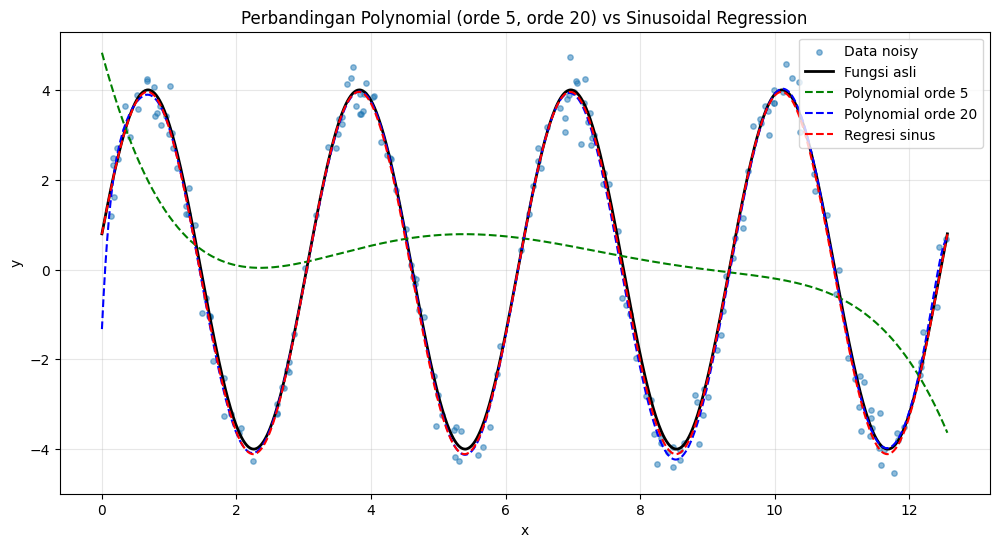

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Data
n = 200
NPM = 58
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

x_grid = np.linspace(0, 4*np.pi, 1000)
y_true_grid = 4*np.sin(2*x_grid + 0.2)

# 1. Polynomial Regression (orde 5)
degree_low = 5
coeffs_low = np.polyfit(x, y_noisy, deg=degree_low)
poly_model_low = np.poly1d(coeffs_low)
y_poly_low = poly_model_low(x_grid)
y_poly_low_pred = poly_model_low(x)

mse_poly_low = mean_squared_error(y_noisy, y_poly_low_pred)
rmse_poly_low = np.sqrt(mse_poly_low)
r2_poly_low = r2_score(y_noisy, y_poly_low_pred)
amp_poly_low = (np.max(y_poly_low) - np.min(y_poly_low)) / 2

# 2. Polynomial Regression (orde 20)
degree_high = 20
coeffs_high = np.polyfit(x, y_noisy, deg=degree_high)
poly_model_high = np.poly1d(coeffs_high)
y_poly_high = poly_model_high(x_grid)
y_poly_high_pred = poly_model_high(x)

mse_poly_high = mean_squared_error(y_noisy, y_poly_high_pred)
rmse_poly_high = np.sqrt(mse_poly_high)
r2_poly_high = r2_score(y_noisy, y_poly_high_pred)
amp_poly_high = (np.max(y_poly_high) - np.min(y_poly_high)) / 2

# 3. Sinusoidal Regression (sin + cos)
A = np.column_stack([np.sin(2*x), np.cos(2*x), np.ones_like(x)])
theta, *_ = np.linalg.lstsq(A, y_noisy, rcond=None)
a, b, c = theta

amplitude = np.sqrt(a**2 + b**2)
phase = np.arctan2(b, a)

y_sin = a*np.sin(2*x_grid) + b*np.cos(2*x_grid) + c
y_sin_pred = a*np.sin(2*x) + b*np.cos(2*x) + c

mse_sin = mean_squared_error(y_noisy, y_sin_pred)
rmse_sin = np.sqrt(mse_sin)
r2_sin = r2_score(y_noisy, y_sin_pred)

# Output Hasil
print("=== Polynomial Regression (orde 5) ===")
print(f"Amplitudo (aproksimasi) : {amp_poly_low:.4f}")
print(f"MSE   : {mse_poly_low:.4f}")
print(f"RMSE  : {rmse_poly_low:.4f}")
print(f"R²    : {r2_poly_low:.4f}")

print("\n=== Polynomial Regression (orde 20) ===")
print(f"Amplitudo (aproksimasi) : {amp_poly_high:.4f}")
print(f"MSE   : {mse_poly_high:.4f}")
print(f"RMSE  : {rmse_poly_high:.4f}")
print(f"R²    : {r2_poly_high:.4f}")

print("\n=== Sinusoidal Regression ===")
print(f"Persamaan : y ≈ {amplitude:.4f} * sin(2x + {phase:.4f}) + {c:.4f}")
print(f"Amplitudo : {amplitude:.4f}")
print(f"Phase     : {phase:.4f}")
print(f"Offset    : {c:.4f}")
print(f"MSE   : {mse_sin:.4f}")
print(f"RMSE  : {rmse_sin:.4f}")
print(f"R²    : {r2_sin:.4f}")

# Plot
plt.figure(figsize=(12,6))
plt.scatter(x, y_noisy, label="Data noisy", alpha=0.5, s=15)
plt.plot(x_grid, y_true_grid, label="Fungsi asli", color="black", linewidth=2)
plt.plot(x_grid, y_poly_low, label="Polynomial orde 5", linestyle="--", color="green")
plt.plot(x_grid, y_poly_high, label="Polynomial orde 20", linestyle="--", color="blue")
plt.plot(x_grid, y_sin, label="Regresi sinus", linestyle="--", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Perbandingan Polynomial (orde 5, orde 20) vs Sinusoidal Regression")
plt.grid(alpha=0.3)
plt.show()

Dari hasil perbandingan terlihat bahwa regresi polinomial orde 5(garis hijau) menghasilkan garis yang terlalu kaku sehingga tidak mampu mengikuti detail gelombang data, sedangkan orde 20 (garis biru) jauh lebih fleksibel dan dapat menyesuaikan pola noisy dengan sangat baik, meskipun muncul sedikit osilasi karena kompleksitas tinggi. Sementara itu, regresi sinusoidal (garis merah) menunjukkan kurva yang lebih mulus dan konsisten mengikuti bentuk gelombang asli, sesuai dengan karakteristik fungsi dasar sinus. Secara metrik, polynomial regression orde 20 mampu memberikan akurasi tinggi dengan R² = 0.9864 dan RMSE = 0.3489, namun metode ini rawan overfitting dan numeriknya kurang stabil pada orde tinggi diatas 20 dan MSE buruk saat orde rendah. Sebaliknya, sinusoidal regression menghasilkan parameter yang sangat dekat dengan fungsi asli (amplitudo ≈ 4, fase ≈ 0,2, offset ≈ 0) dengan R² = 0.9855 dan RMSE = 0.3590. Meskipun sedikit lebih tinggi dari segi error, regresi sinusoidal lebih tepat secara teoretis karena sesuai dengan bentuk dasar data, sehingga metode ini memang sesuai dengn kebutuhan data sinusoid seperti data asli yang digunakan.